In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-sales-fy202021/Amazon Sales FY2020-21.csv


In [3]:
df=pd.read_csv("/kaggle/input/amazon-sales-fy202021/Amazon Sales FY2020-21.csv")
df

<ipython-input-3-ccc3612bdc51>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/kaggle/input/amazon-sales-fy202021/Amazon Sales FY2020-21.csv")


,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286387,100562365,30/09/2021,paid,905179,APPCHA5AF14939B8F8A,2,4419.9,4419.9,0.0,4419.9,...,3/21/2007,212-772-7404,Rushville,Yates,Rushville,NY,14544,Northeast,bklatham,0.0
286388,100562376,30/09/2021,cod,905191,MEFCOT5A8D1E973B886,2,39.9,39.9,0.0,39.9,...,10/24/2011,229-817-9451,Lawrenceville,Gwinnett,Lawrenceville,GA,30044,South,bmbrunetti,0.0
286389,100562383,30/09/2021,cod,905200,WOFVAL59D5EA84167F9-M,2,40.0,40.0,0.0,40.0,...,7/25/1987,252-414-8396,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0
286390,100562384,30/09/2021,cod,905202,WOFNIG5B4D7EB0E9FDD-L,2,49.9,49.9,0.0,49.9,...,7/25/1987,252-414-8396,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  int64  
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  int64  
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  int64  
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [5]:
df['category'].unique()

array(["Men's Fashion", 'Mobiles & Tablets', 'Computing', 'Appliances',
       'Home & Living', "Women's Fashion", 'Health & Sports',
       'Beauty & Grooming', 'Superstore', 'Others', 'Entertainment',
       'Soghaat', 'Kids & Baby', 'Books', 'School & Education'],
      dtype=object)

In [6]:
df.isnull().sum()

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Sign in date        0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

In [7]:
df

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286387,100562365,30/09/2021,paid,905179,APPCHA5AF14939B8F8A,2,4419.9,4419.9,0.0,4419.9,...,3/21/2007,212-772-7404,Rushville,Yates,Rushville,NY,14544,Northeast,bklatham,0.0
286388,100562376,30/09/2021,cod,905191,MEFCOT5A8D1E973B886,2,39.9,39.9,0.0,39.9,...,10/24/2011,229-817-9451,Lawrenceville,Gwinnett,Lawrenceville,GA,30044,South,bmbrunetti,0.0
286389,100562383,30/09/2021,cod,905200,WOFVAL59D5EA84167F9-M,2,40.0,40.0,0.0,40.0,...,7/25/1987,252-414-8396,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0
286390,100562384,30/09/2021,cod,905202,WOFNIG5B4D7EB0E9FDD-L,2,49.9,49.9,0.0,49.9,...,7/25/1987,252-414-8396,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0


In [9]:
#df = df.drop_duplicates()

# Parse Dates
df['order_date'] = pd.to_datetime(df['order_date'],dayfirst=True)

# Add Sales Column
df['sales'] = df['qty_ordered'] * df['price']

# Add Discounted Price Column
df['discounted_price'] = df['price'] - df['discount_amount']

# Add Profit Column
df['profit'] = df['sales'] - df['discount_amount']

# Extract Time Features
df['day'] = df['order_date'].dt.day
df['week'] = df['order_date'].dt.isocalendar().week
df['quarter'] = df['order_date'].dt.quarter

# Group Data by Category and Date
grouped_sales = df.groupby(['order_date', 'category'])['sales'].sum().reset_index()

# Fill Missing Dates for Time-Series
categories = grouped_sales['category'].unique()
all_dates = pd.date_range(start=df['order_date'].min(), end=df['order_date'].max())
complete_data = pd.DataFrame({'order_date': all_dates})
final_data = pd.concat([
    complete_data.merge(
        grouped_sales[grouped_sales['category'] == category],
        on='order_date',
        how='left'
    ).fillna(0).assign(category=category)
    for category in categories
])

# Final Aggregated Data for Forecasting
print(final_data.head())

  order_date    category      sales
0 2020-10-01  Appliances  58414.400
1 2020-10-02  Appliances   9006.500
2 2020-10-03  Appliances  28574.078
3 2020-10-04  Appliances   2747.000
4 2020-10-05  Appliances  62919.100


In [10]:
grouped_sales['category'].unique()

array(['Appliances', 'Beauty & Grooming', 'Books', 'Computing',
       'Entertainment', 'Health & Sports', 'Home & Living', 'Kids & Baby',
       "Men's Fashion", 'Mobiles & Tablets', 'Others',
       'School & Education', 'Soghaat', 'Superstore', "Women's Fashion"],
      dtype=object)

In [11]:
problematic_categories = [category for category in final_data['category'].unique() if final_data[final_data['category'] == category].shape[0] < 2]
print("Categories with insufficient data:", problematic_categories)

for category in problematic_categories:
    print(final_data[final_data['category'] == category])

Categories with insufficient data: []


In [49]:
from prophet import Prophet

# Create a function to train a Prophet model for each category
def train_forecast_model(data, category):
    category_data = data[data['category'] == category]
    category_data = category_data.rename(columns={"order_date": "ds", "category": "y"})
    category_data['y'] = pd.to_numeric(category_data['y'], errors='coerce')
    category_data = category_data.dropna(subset=['y'])# Drop rows with NaN values
    category_data['y'] = category_data['y'].clip(lower=category_data['y'].quantile(0.01), 
                       upper=category_data['y'].quantile(0.99))

# Consider log transformation if data is skewed
    #category_data['y'] = np.log1p(category_data['y'])
    # Check if there are at least two rows
    if category_data.shape[0] < 2:
        print(f"Skipping category '{category}' due to insufficient data.")
        return None, None

    
    # Initialize and train the model
    model = Prophet()
    model.fit(category_data)
    
    # Create future dataframe for forecasting
    future = model.make_future_dataframe(periods=1)  # Forecast for 30 days
    forecast = model.predict(future)
    
    return model, forecast

# Train models for each category
category_models = {}
for category in grouped_sales['category'].unique():
    model, forecast = train_forecast_model(grouped_sales, category)
    category_models[category] = model
    forecast.to_csv(f"{category}_forecast.csv", index=False)  # Save forecast

print("Models trained for all categories!")

Skipping category 'Appliances' due to insufficient data.


AttributeError: 'NoneType' object has no attribute 'to_csv'

13:36:12 - cmdstanpy - INFO - Chain [1] start processing
13:36:12 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Forecast saved for category: Mobiles & Tablets


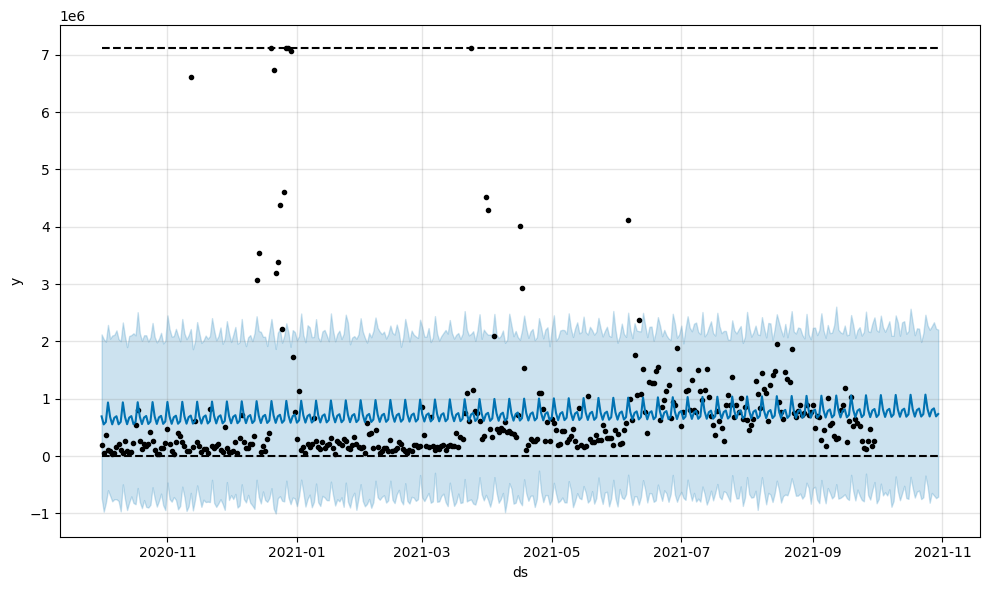

In [27]:
from prophet import Prophet

# Prepare Data for a Specific Category
category = "Mobiles & Tablets"
category_data = final_data[final_data['category'] == category][['order_date', 'sales']]
category_data = category_data.rename(columns={'order_date': 'ds', 'sales': 'y'})
category_data['y'] = category_data['y'].clip(lower=category_data['y'].quantile(0.01), 
                       upper=category_data['y'].quantile(0.99))

# Consider log transformation if data is skewed
#category_data['y'] = np.log1p(category_data['y'])


max_sales = category_data['y'].max()
category_data['cap'] = max_sales  # Set upper limit to the max sales value

# Optionally, add a floor if sales cannot go below a certain value
category_data['floor'] = 0  # Set the minimum limit to 0

# Train Prophet Model with capped data
model = Prophet(growth="logistic", 
    changepoint_prior_scale=0.05,  # Adjust trend flexibility
    seasonality_prior_scale=10,    # Increase seasonality strength
)  
model.fit(category_data)

# Make future predictions
future = model.make_future_dataframe(periods=30)  # Extend forecast for 30 days
future['cap'] = max_sales
future['floor'] = 0
forecast = model.predict(future)

# Plot Results
model.plot(forecast)

    
    # Save forecast to a CSV
forecast.to_csv(f"{category}_forecast.csv", index=False)
print(f"Forecast saved for category: {category}")
    


In [29]:
mobile_tab=pd.read_csv("/kaggle/working/Mobiles & Tablets_forecast.csv")
mobile_tab

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-01,667959.127333,7.108880e+06,0,-722607.384562,2.122253e+06,667959.127333,667959.127333,25189.464153,25189.464153,25189.464153,25189.464153,25189.464153,25189.464153,0.0,0.0,0.0,693148.591486
1,2020-10-02,668285.379883,7.108880e+06,0,-968467.925090,2.040409e+06,668285.379883,668285.379883,-115140.518471,-115140.518471,-115140.518471,-115140.518471,-115140.518471,-115140.518471,0.0,0.0,0.0,553144.861412
2,2020-10-03,668611.775242,7.108880e+06,0,-814184.671998,1.995147e+06,668611.775242,668611.775242,-73640.124936,-73640.124936,-73640.124936,-73640.124936,-73640.124936,-73640.124936,0.0,0.0,0.0,594971.650307
3,2020-10-04,668938.313459,7.108880e+06,0,-594242.380390,2.287861e+06,668938.313459,668938.313459,266539.823189,266539.823189,266539.823189,266539.823189,266539.823189,266539.823189,0.0,0.0,0.0,935478.136647
4,2020-10-05,669264.994578,7.108880e+06,0,-688355.182291,2.047957e+06,669264.994578,669264.994578,13801.849444,13801.849444,13801.849444,13801.849444,13801.849444,13801.849444,0.0,0.0,0.0,683066.844022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2021-10-26,806598.539726,7.108880e+06,0,-812710.207517,2.202255e+06,806598.160768,806598.920018,-115503.669227,-115503.669227,-115503.669227,-115503.669227,-115503.669227,-115503.669227,0.0,0.0,0.0,691094.870498
391,2021-10-27,806984.361415,7.108880e+06,0,-640880.418162,2.264693e+06,806983.954744,806984.771175,-1246.824151,-1246.824151,-1246.824151,-1246.824151,-1246.824151,-1246.824151,0.0,0.0,0.0,805737.537264
392,2021-10-28,807370.344013,7.108880e+06,0,-684637.946433,2.334100e+06,807369.916283,807370.782185,25189.464153,25189.464153,25189.464153,25189.464153,25189.464153,25189.464153,0.0,0.0,0.0,832559.808165
393,2021-10-29,807756.487563,7.108880e+06,0,-732446.353828,2.221795e+06,807756.031661,807756.957223,-115140.518470,-115140.518470,-115140.518470,-115140.518470,-115140.518470,-115140.518470,0.0,0.0,0.0,692615.969093


In [13]:
books=pd.read_csv("//kaggle/working/Books_forecast.csv")
books

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-01,164.739494,1590.76,0,-224.132073,461.669395,164.739494,164.739494,-43.076238,-43.076238,-43.076238,-43.076238,-43.076238,-43.076238,0.0,0.0,0.0,121.663256
1,2020-10-02,164.596318,1590.76,0,-204.990945,503.524836,164.596318,164.596318,-8.990846,-8.990846,-8.990846,-8.990846,-8.990846,-8.990846,0.0,0.0,0.0,155.605472
2,2020-10-03,164.453252,1590.76,0,-225.436841,482.601128,164.453252,164.453252,-41.091562,-41.091562,-41.091562,-41.091562,-41.091562,-41.091562,0.0,0.0,0.0,123.361690
3,2020-10-04,164.310296,1590.76,0,-155.316451,523.756153,164.310296,164.310296,22.299462,22.299462,22.299462,22.299462,22.299462,22.299462,0.0,0.0,0.0,186.609758
4,2020-10-05,164.167450,1590.76,0,-181.848475,530.665384,164.167450,164.167450,1.991552,1.991552,1.991552,1.991552,1.991552,1.991552,0.0,0.0,0.0,166.159002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2021-10-26,118.100154,1590.76,0,-197.071217,515.417882,118.096192,118.104179,52.291010,52.291010,52.291010,52.291010,52.291010,52.291010,0.0,0.0,0.0,170.391165
391,2021-10-27,117.998101,1590.76,0,-204.379601,478.273697,117.993882,118.002526,16.576620,16.576620,16.576620,16.576620,16.576620,16.576620,0.0,0.0,0.0,134.574721
392,2021-10-28,117.896128,1590.76,0,-257.572069,460.682050,117.891576,117.900896,-43.076238,-43.076238,-43.076238,-43.076238,-43.076238,-43.076238,0.0,0.0,0.0,74.819891
393,2021-10-29,117.794237,1590.76,0,-260.874331,443.343738,117.789312,117.799334,-8.990846,-8.990846,-8.990846,-8.990846,-8.990846,-8.990846,0.0,0.0,0.0,108.803391


* yhat: The predicted sales value for each date.

* yhat_lower and yhat_upper: The range of possible sales values with uncertainty.

* cap: The maximum sales value used to constrain predictions.

* floor: The minimum sales value (in this case, 0).

In [30]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Preprocess data for ARIMA
arima_data = final_data[final_data['category'] == "Mobiles & Tablets"]
arima_data = arima_data[['order_date', 'sales']].rename(columns={'order_date': 'ds', 'sales': 'y'})
arima_data.set_index('ds', inplace=True)

# Fit ARIMA model (p=2, d=1, q=2 as an example)
model = ARIMA(arima_data['y'], order=(2, 1, 2))
arima_result = model.fit()

# Forecast next 30 days
forecast = arima_result.forecast(steps=30)
forecast_df = pd.DataFrame({'ds': pd.date_range(start=arima_data.index[-1], periods=30, freq='D'),
                            'yhat': forecast})
print(forecast_df)

# Save forecast to CSV
forecast_df.to_csv("Books_ARIMA_forecast.csv", index=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                   ds           yhat
2021-10-01 2021-09-30  422942.757319
2021-10-02 2021-10-01  491496.594094
2021-10-03 2021-10-02  530476.696694
2021-10-04 2021-10-03  557961.203383
2021-10-05 2021-10-04  580067.495882
2021-10-06 2021-10-05  598975.396788
2021-10-07 2021-10-06  615556.217205
2021-10-08 2021-10-07  630235.591353
2021-10-09 2021-10-08  643277.850195
2021-10-10 2021-10-09  654880.809002
2021-10-11 2021-10-10  665208.302561
2021-10-12 2021-10-11  674402.175149
2021-10-13 2021-10-12  682587.397559
2021-10-14 2021-10-13  689874.803340
2021-10-15 2021-10-14  696362.929248
2021-10-16 2021-10-15  702139.458813
2021-10-17 2021-10-16  707282.443747
2021-10-18 2021-10-17  711861.370485
2021-10-19 2021-10-18  715938.102917
2021-10-20 2021-10-19  719567.719475
2021-10-21 2021-10-20  722799.257690
2021-10-22 2021-10-21  725676.376844
2021-10-23 2021-10-22  728237.947867
2021-10-24 2021-10-23  730518.578512
2021-10-25 2021-10-24  732549.080924
2021-10-26 2021-10-25  734356.887925
2

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib as plt
import numpy as np

# Normalize Data
category_data = final_data[final_data['category'] == 'Mobiles & Tablets']
category_data.set_index('order_date', inplace=True)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(category_data['sales'].values.reshape(-1, 1))

# Create Sequences for LSTM
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30  # Use last 30 days to predict the next day's sales
X, y = create_sequences(scaled_sales, time_step)

# Train-Test Split
X_train, X_test = X[:int(len(X) * 0.8)], X[int(len(X) * 0.8):]
y_train, y_test = y[:int(len(y) * 0.8)], y[int(len(y) * 0.8):]

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)




Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0068
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0075
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0050
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0101
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0060
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0116
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0084
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0057
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0093
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0046
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0084
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0065
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0049
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0063  
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12m

In [26]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Feature Engineering
final_data['day_of_week'] = final_data['order_date'].dt.dayofweek
final_data['month'] = final_data['order_date'].dt.month
final_data['lag_1'] = final_data['sales'].shift(1)
final_data['rolling_mean_7'] = final_data['sales'].rolling(7).mean()
final_data.dropna(inplace=True)

# Filter Data for a Category (e.g., 'Books')
category_data = final_data[final_data['category'] == 'Mobiles & Tablets']

# Define Features and Target
X = category_data[['day_of_week', 'month', 'lag_1', 'rolling_mean_7']]
y = category_data['sales']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train XGBoost Model
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')



RMSE: 375915.7828193876


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define parameter distributions
param_dist = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': uniform(0.01, 0.2),  # Randomly sample learning rates
    'subsample': uniform(0.7, 0.3),       # Randomly sample subsample
    'colsample_bytree': uniform(0.7, 0.3),
    'min_child_weight': [1, 3, 5, 7]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror'),
    param_distributions=param_dist,
    scoring='neg_root_mean_squared_error',
    n_iter=50,  # Number of parameter combinations to try
    cv=3,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train model with best parameters
model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'colsample_bytree': 0.8351497755908628, 'learning_rate': 0.012652992231973307, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 300, 'subsample': 0.9425192044349383}
RMSE: 1049.397757728747
